In [40]:
# Importing Libraries
import warnings
import os
import sys
import warnings
import numpy as  np
import pandas as pd
import csv
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Features
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE

#Model 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

warnings.simplefilter('ignore')
plt.ion()
%matplotlib inline

In [3]:
train_data=pd.read_csv('../newtrain.csv')
test_data=pd.read_csv('../newval.csv')

In [4]:
def load_image(path):
    im = Image.open(path).convert('RGB')
    im = im.resize((32,32))
    im = np.array(im)
    im = im/256
    return im

In [5]:
# Displays N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

## Load Data

In [6]:
X_train= []
y_train_age = []
y_train_gender=[]
y_train_ethnicity=[]


for i in range(len(train_data)):
        im = load_image(train_data['image_path'][i])
        y_1 = train_data['age'][i]
        y_2 = train_data['gender'][i]
        y_3 = train_data['ethnicity'][i]
        X_train.append(im)
        y_train_age.append(y_1)
        y_train_gender.append(y_2)
        y_train_ethnicity.append(y_3)

X_train = np.array(X_train)
y_train_age = np.array(y_train_age)
y_train_gender = np.array(y_train_gender)
y_train_ethnicity = np.array(y_train_ethnicity)

In [7]:
X_test= []
y_test_age = []
y_test_gender=[]
y_test_ethnicity=[]


for i in range(len(test_data)):
        im = load_image(test_data['image_path'][i])
        y_1 = test_data['age'][i]
        y_2 = test_data['gender'][i]
        y_3 = test_data['ethnicity'][i]
        X_test.append(im)
        y_test_age.append(y_1)
        y_test_gender.append(y_2)
        y_test_ethnicity.append(y_3)

X_test = np.array(X_test)
y_test_age = np.array(y_test_age)
y_test_gender = np.array(y_test_gender)
y_test_ethnicity = np.array(y_test_ethnicity)

print("Dataset shape:",X_test.shape)

Dataset shape: (5007, 32, 32, 3)


In [12]:
# Displays N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        plt.imshow(img)
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

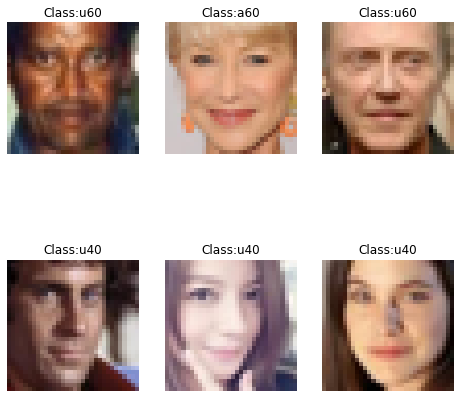

In [13]:
# Showing sample images
ind = np.random.randint(0,y_train_age.shape[0],6)
disply_images(X_train[ind,...],y_train_age[ind], row=2,col=3)

## Feature Extraction

1.PCA 

2.Kernel PCA 

3.LDA 

4.Kernel LDA

5.Transfer Learning-VGG19 

*HuMoments and Histograms of Oriented Gradient did not work for us

*Resnet50 feature extraction resulted in a large feature set which couldn't be loaded in my system\n

In [18]:
# Eigen Faces
def get_pca(X,k):
    pca = PCA(n_components=k, svd_solver='full')
    faces = pca.fit_transform(X)
    return faces

#Kernel Face
def get_kernel_pca(X,k,kernel='rbf', degree=3):
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    faces= kpca.fit_transform(X)
    return faces

#Fisher Face

def get_lda(X, y, k):
    lda = LDA(n_components=k)
    faces = lda.fit_transform(X,y)
    return faces

#Kernel LDA Face

def get_kernel_lda(X,y,k,kernel='rbf',degree=3):
    var = np.var(X)
    X_transformed= np.exp(-X/(2*var))
    klda = LDA(n_components=k)
    faces = klda.fit_transform(X_transformed,y)
    return faces

def flat(X):
    N,H,W = X.shape[0:3]
    C = X.shape[3]
    # Flattening to apply PCA/LDA
    X = X.reshape((N,H*W*C))
    return X

In [19]:
X_train=flat(X_train)
X_test=flat(X_test)

In [20]:
def analyze(dataset):
    X_use = dataset
    eigenvalues, _ = np.linalg.eig(np.cov(X_use.T))
    eigenvalues = np.sort(eigenvalues)
    eigenvalues = np.flip(eigenvalues) / np.linalg.norm(eigenvalues)

    sum_of_eigenvalues = np.sum(np.real(eigenvalues))

    count = 0
    for value in range(len(eigenvalues)):
        count += 1
        if (np.sum(np.real(eigenvalues[0:count]) / sum_of_eigenvalues)) >= 0.95:
            break

    print("Number of Eigenvalues required for PCA :", str(count))

    plt.figure()
    plt.title('Eigenvalue Spectrum')
    plt.xlabel('Eigenvalue Rank')
    plt.ylabel('Eigenvalue')
    plt.plot(np.real(eigenvalues[0:150]))
    plt.savefig('./'+'Eigen_Faces'+".png", format = 'png', dpi=500)
    plt.show()

Number of Eigenvalues required for PCA : 137


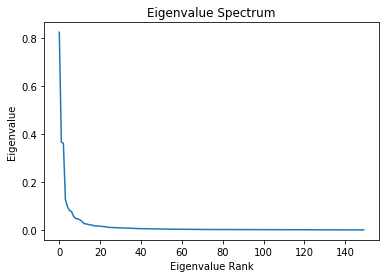

In [21]:
analyze(X_train)

In [22]:
# Compute your features 
X_3D = get_kernel_lda(X_train,y_train_age,3)

#### Encoding Label into integer for Feature Extraction

In [23]:
def encoding(labels):
    le=LabelEncoder()
    target=le.fit_transform(labels)
    return target

In [24]:
y_train_age=encoding(y_train_age)
y_train_ethnicity=encoding(y_train_ethnicity)
y_train_gender=encoding(y_train_gender)

y_test_age=encoding(y_test_age)
y_test_ethnicity=encoding(y_test_ethnicity)
y_test_gender=encoding(y_test_gender)

## Plotting Kernel LDA for AGE

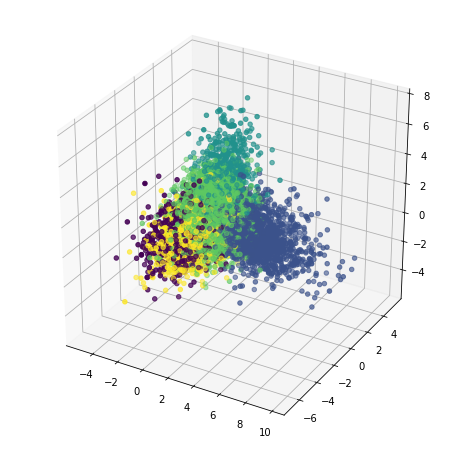

In [26]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y_train_age)
fig.savefig('../'+'Kernel_LDA'+".png", format = 'png', dpi=500)
fig.show()

## Image Reconstruction using PCA

In [27]:
def reconstruction(X):
    pca = PCA(n_components=48, svd_solver='full')
    X_k = pca.fit_transform(X)
    reconstructed = pca.inverse_transform(X_k)
    return reconstructed

In [30]:
figure_number=1
import matplotlib as mpl
figure_number = 1

def normalize(mat):
    mat_max = np.max(mat.astype(np.float64))
    new_matrix = mat / mat_max
    return new_matrix

def display_images(imgs,classes,row = 1, col = 2, w = 64,h = 64):
    fig = plt.figure(figsize = (8, 8))
    for i in range(1, col * row + 1):
        img = imgs[i - 1]
        fig.add_subplot(row, col, i)
        plt.imshow(normalize(img).astype(np.float64), vmin = 0, vmax = 255, norm = mpl.colors.Normalize(vmin = 0, vmax = 255, clip=True)) 
        plt.title("Class:{}".format(classes[i - 1]))
        plt.axis('off')
    global figure_number
    plt.savefig('../'+str(figure_number) + ".png", format = 'png', dpi = 500)
    figure_number += 1
    
    plt.show()

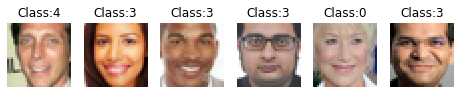

In [31]:
ind = np.random.randint(0,y_train_age.shape,6)
display_images(X_train[ind,...].reshape(-1, 32, 32, 3),y_train_age[ind], row=1,col=6)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


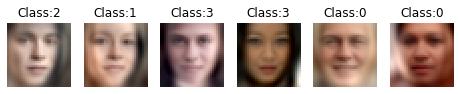

Data Reconstruction Error = 0.07440972484467755


In [32]:
X_reconstructed = reconstruction(X_train)
ind = np.random.randint(0,y_train_age.shape,6)
display_images(X_reconstructed[ind,...].reshape(-1, 32, 32, 3),y_train_age[ind], row=1,col=6)
print("Data Reconstruction Error = " + str(np.sqrt(np.mean((X_train - X_reconstructed) ** 2))))

## Classification Models

In [34]:
class Classifier():
    def __init__(self, classifier_type):
        if classifier_type == 0:
            # MLP
            self.model = MLPClassifier(hidden_layer_sizes = (1024, 512, 256), max_iter = 1000)
        elif classifier_type == 1:
            # SVM
            self.model = SVC(gamma = 'scale',class_weight='balanced', max_iter = 1000)
        elif classifier_type == 2:
            # Decision Tree
            self.model = DecisionTreeClassifier(class_weight='balanced')
        elif classifier_type == 3:
            # Logistic Regression
            self.model = LogisticRegression(multi_class = 'multinomial',class_weight='balanced', solver = 'lbfgs', max_iter = 2000)
    
    def classify(self,X):
        return self.model.predict(X)
        
    def confusion_matrix(self,pred,y):
        return confusion_matrix(pred, y)
        
    def train(self,X_train,y_train):
        self.model.fit(X_train, y_train)
        
    def validate(self,X_val,y_val):
        y_pred = self.model.predict(X_val)
        
        # Create a confusion matrix
        conf = self.confusion_matrix(y_val, y_pred)
        
        # Calculate Validation accuracy
        acc = self.model.score(X_val, y_val)
        
        # Calculate precision and recall 
        precision = precision_score(y_val, y_pred, average='macro')
        recall = recall_score(y_val, y_pred, average='macro')
        
        # Calculate F1-score
        f1_scr = f1_score(y_val, y_pred, average='micro')
        return {'confusion_mat': conf, 'accuracy' : acc, 'error': (1 - acc), 'precision' : precision, 'f1-score' : f1_scr, 'recall' : recall, 'features' : X_val.shape[1]}

In [35]:
def get_features(X,y,features):
    if feature == 0:
        return get_pca(X, 120)
    
    elif feature == 1:
        return get_kernel_pca(X, 40)
    
    elif feature == 2:
        return get_lda(X, y, 35)
    
    elif feature == 3:
        return get_kernel_lda(X, y, 35)

## Age-Classification Models

In [36]:
model_result=[]
for feature in range(4):
    X_train_model=get_features(X_train, y_train_age, feature)
    X_test_model=get_features(X_test,y_test_age,feature)
    for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(X_train_model,y_train_age)
        result=clf_imfdb.validate(X_test_model,y_test_age)
        model_result.append(result)

In [38]:
# Results
from IPython.display import display

classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['PCA', 'k-PCA', 'LDA', 'k-LDA']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result],
    'Accuracy':[i['accuracy'] for i in model_result],
    'Errors':[i['error'] for i in model_result],
    'Precion':[i['precision'] for i in model_result],
    'Recall':[i['recall'] for i in model_result],
    'F1-Score':[i['f1-score'] for i in model_result]
}
df=pd.DataFrame(index=index_arr,data=d)
display(df)
df.to_csv('../age_models.csv', index = index_arr, header=True)

,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
PCA + MLP,120,0.415418,0.584582,0.279022,0.283493,0.415418
PCA + SVM,120,0.147394,0.852606,0.155023,0.287308,0.147394
PCA + DT,120,0.347513,0.652487,0.223862,0.222723,0.347513
PCA + LR,120,0.332534,0.667466,0.291521,0.307391,0.332534
k-PCA + MLP,40,0.357899,0.642101,0.253363,0.259732,0.357899
k-PCA + SVM,40,0.143399,0.856601,0.163650,0.295543,0.143399
k-PCA + DT,40,0.361694,0.638306,0.241056,0.238752,0.361694
k-PCA + LR,40,0.305772,0.694228,0.283319,0.310004,0.305772
LDA + MLP,4,0.934492,0.065508,0.908459,0.949259,0.934492
LDA + SVM,4,0.509886,0.490114,0.640529,0.767139,0.509886


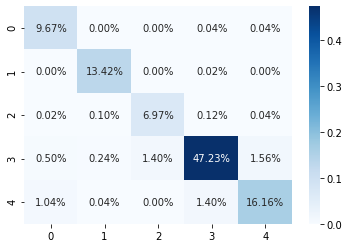

In [41]:
# Confusion Matrix  
cf_matrix=model_result[8]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%', cmap='Blues')
plt.savefig('../age_best_matrix.jpg')

## Gender-Classification Model

In [42]:
model_result_2=[]
for feature in range(4):
    X_train_model=get_features(X_train, y_train_gender, feature)
    X_test_model=get_features(X_test,y_test_gender,feature)
    for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(X_train_model,y_train_gender)
        result=clf_imfdb.validate(X_test_model,y_test_gender)
        model_result_2.append(result)

In [43]:
# Results
from IPython.display import display

classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['PCA', 'k-PCA', 'LDA', 'k-LDA']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result_2],
    'Accuracy':[i['accuracy'] for i in model_result_2],
    'Errors':[i['error'] for i in model_result_2],
    'Precion':[i['precision'] for i in model_result_2],
    'Recall':[i['recall'] for i in model_result_2],
    'F1-Score':[i['f1-score'] for i in model_result_2]
}
df_gender=pd.DataFrame(index=index_arr,data=d)
display(df_gender)
df_gender.to_csv('../gender_models.csv', index = index_arr, header=True)

,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
PCA + MLP,120,0.587577,0.412423,0.589058,0.588868,0.587577
PCA + SVM,120,0.480927,0.519073,0.540404,0.500161,0.480927
PCA + DT,120,0.524266,0.475734,0.523502,0.523496,0.524266
PCA + LR,120,0.586579,0.413421,0.585833,0.585748,0.586579
k-PCA + MLP,40,0.573597,0.426403,0.572785,0.572693,0.573597
k-PCA + SVM,40,0.480727,0.519273,0.240363,0.500000,0.480727
k-PCA + DT,40,0.550030,0.449970,0.549507,0.549538,0.550030
k-PCA + LR,40,0.611943,0.388057,0.611263,0.611158,0.611943
LDA + MLP,1,0.986419,0.013581,0.986312,0.986507,0.986419
LDA + SVM,1,0.519273,0.480727,0.259637,0.500000,0.519273


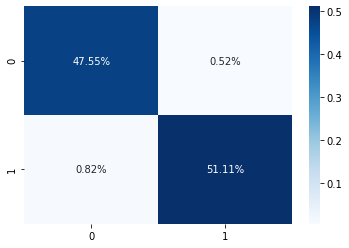

In [58]:
# Confusion Matrix  
cf_matrix=model_result_2[11]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.savefig('../gender_best_matrix.jpg')

## Ethnicity

In [45]:
model_result_3=[]
for feature in range(4):
    X_train_model=get_features(X_train, y_train_ethnicity, feature)
    X_test_model=get_features(X_test,y_test_ethnicity,feature)
    for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(X_train_model,y_train_ethnicity)
        result=clf_imfdb.validate(X_test_model,y_test_ethnicity)
        model_result_3.append(result)

In [46]:
# Results
from IPython.display import display

classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['PCA', 'k-PCA', 'LDA', 'k-LDA']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result_3],
    'Accuracy':[i['accuracy'] for i in model_result_3],
    'Errors':[i['error'] for i in model_result_3],
    'Precion':[i['precision'] for i in model_result_3],
    'Recall':[i['recall'] for i in model_result_3],
    'F1-Score':[i['f1-score'] for i in model_result_3]
}
df_ethnicity=pd.DataFrame(index=index_arr,data=d)
display(df_ethnicity)
df_ethnicity.to_csv('../ethnicity_models.csv', index = index_arr, header=True)

,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
PCA + MLP,120,0.395047,0.604953,0.297303,0.292694,0.395047
PCA + SVM,120,0.142401,0.857599,0.198015,0.257195,0.142401
PCA + DT,120,0.354104,0.645896,0.272180,0.269975,0.354104
PCA + LR,120,0.361094,0.638906,0.311851,0.313606,0.361094
k-PCA + MLP,40,0.276613,0.723387,0.218956,0.221995,0.276613
k-PCA + SVM,40,0.103855,0.896145,0.146636,0.225422,0.103855
k-PCA + DT,40,0.289195,0.710805,0.222757,0.221355,0.289195
k-PCA + LR,40,0.323347,0.676653,0.278664,0.286928,0.323347
LDA + MLP,4,0.634711,0.365289,0.438397,0.527489,0.634711
LDA + SVM,4,0.371480,0.628520,0.424756,0.406314,0.371480


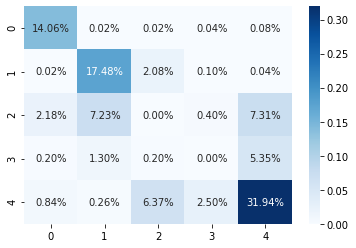

In [47]:
# Confusion Matrix  
cf_matrix=model_result_3[8]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.savefig('../ethnicity_best_matrix.jpg')

## Transfer Learning

In [48]:
# Keras Pre-Trained Models
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

### Feature Extraction from VGG19 Pretrained Model

In [49]:
zmodel_VGG19 = VGG19(weights='imagenet', include_top=False)
def get_vgg19_features(path):
    img = image.load_img(path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    vgg19_feature = model_VGG19.predict(img_data)
    vgg19_features_np=np.array(vgg19_feature)
    vgg19_features_np=vgg19_features_np.flatten()
    return vgg19_features_np

In [53]:
train_model=[]
for i in range(len(train_data)):
    train_model.append(get_vgg19_features(train_data['image_path'][i]))
x_train=np.array(train_model)

In [54]:
x_train.shape

(18698, 25088)

In [55]:
test_model=[]
for i in range(len(test_data)):
    test_model.append(get_vgg19_features(test_data['image_path'][i]))
x_test=np.array(test_model)

In [56]:
x_test.shape

(5007, 25088)

## Age

In [59]:
model_result_vgg19=[]
for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(x_train,y_train_age)
        result=clf_imfdb.validate(x_test,y_test_age)
        model_result_vgg19.append(result)

In [60]:
# Results
from IPython.display import display

classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['VGG19']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result_vgg19],
    'Accuracy':[i['accuracy'] for i in model_result_vgg19],
    'Errors':[i['error'] for i in model_result_vgg19],
    'Precion':[i['precision'] for i in model_result_vgg19],
    'Recall':[i['recall'] for i in model_result_vgg19],
    'F1-Score':[i['f1-score'] for i in model_result_vgg19]
}
df_age_vgg19=pd.DataFrame(index=index_arr,data=d)
display(df_age_vgg19)
df_age_vgg19.to_csv('../age_vgg19_models.csv', index = index_arr, header=True)


,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
VGG19 + MLP,25088,0.719193,0.280807,0.651125,0.607815,0.719193
VGG19 + SVM,25088,0.309966,0.690034,0.295862,0.558099,0.309966
VGG19 + DT,25088,0.552826,0.447174,0.463640,0.471108,0.552826
VGG19 + LR,25088,0.688436,0.311564,0.622728,0.615400,0.688436


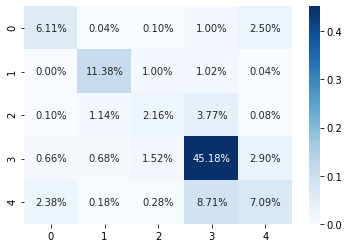

In [61]:
cf_matrix=model_result_vgg19[0]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.savefig('../vgg19_MLP_age.jpg')

## Gender

In [62]:
model_result_vgg19_gender=[]
for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(x_train,y_train_gender)
        result=clf_imfdb.validate(x_test,y_test_gender)
        model_result_vgg19_gender.append(result)

In [63]:
classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['VGG19']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result_vgg19_gender],
    'Accuracy':[i['accuracy'] for i in model_result_vgg19_gender],
    'Errors':[i['error'] for i in model_result_vgg19_gender],
    'Precion':[i['precision'] for i in model_result_vgg19_gender],
    'Recall':[i['recall'] for i in model_result_vgg19_gender],
    'F1-Score':[i['f1-score'] for i in model_result_vgg19_gender]
}
df_gender_vgg19=pd.DataFrame(index=index_arr,data=d)
display(df_gender_vgg19)
df_gender_vgg19.to_csv('../gender_vgg19_models.csv', index = index_arr, header=True)

,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
VGG19 + MLP,25088,0.882564,0.117436,0.882651,0.882081,0.882564
VGG19 + SVM,25088,0.480927,0.519073,0.740412,0.500192,0.480927
VGG19 + DT,25088,0.743359,0.256641,0.743013,0.742723,0.743359
VGG19 + LR,25088,0.859597,0.140403,0.859462,0.859257,0.859597


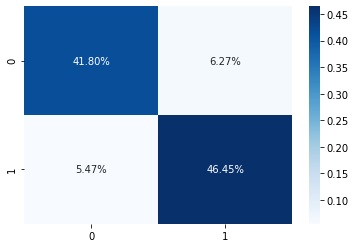

In [64]:
cf_matrix=model_result_vgg19_gender[0]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.savefig('../vgg19_MLP_gender.jpg')

## Ethnicity

In [65]:
model_result_vgg19_ethnicity=[]
for i in range(4):
        clf_imfdb=Classifier(i)
        clf_imfdb.train(x_train,y_train_ethnicity)
        result=clf_imfdb.validate(x_test,y_test_ethnicity)
        model_result_vgg19_ethnicity.append(result)

In [66]:
classifier_type = ['MLP', 'SVM', 'DT', 'LR']
feature_type = ['VGG19']
index_arr = [j + " + "+ i for j in feature_type for i in classifier_type]

d={
    '# Feature':[i['features'] for i in model_result_vgg19_ethnicity],
    'Accuracy':[i['accuracy'] for i in model_result_vgg19_ethnicity],
    'Errors':[i['error'] for i in model_result_vgg19_ethnicity],
    'Precion':[i['precision'] for i in model_result_vgg19_ethnicity],
    'Recall':[i['recall'] for i in model_result_vgg19_ethnicity],
    'F1-Score':[i['f1-score'] for i in model_result_vgg19_ethnicity]
}
df_ethnicity_vgg19=pd.DataFrame(index=index_arr,data=d)
display(df_ethnicity_vgg19)
df_ethnicity_vgg19.to_csv('../ethnicity_vgg19_models.csv', index = index_arr, header=True)

,# Feature,Accuracy,Errors,Precion,Recall,F1-Score
VGG19 + MLP,25088,0.694827,0.305173,0.618810,0.632549,0.694827
VGG19 + SVM,25088,0.342520,0.657480,0.399185,0.498853,0.342520
VGG19 + DT,25088,0.456161,0.543839,0.375500,0.373127,0.456161
VGG19 + LR,25088,0.716796,0.283204,0.641424,0.633071,0.716796


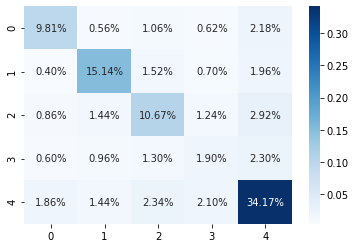

In [69]:
cf_matrix=model_result_vgg19_ethnicity[3]['confusion_mat']
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.savefig('../vgg19_MLP_ethnicity.jpg')